FINAL PROJECT 

IBM Employee Attrition Rate Analyzed By: **Loveline Ezenwafor (ezenwaforchioma@gmail.com)**

Extraction of data from the only table (attribution_records) in IBM Employee Attribution using SQL and Importation of the data into Pandas.

In [36]:
import sqlite3
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

conn = sqlite3.connect(r"C:\Users\lovel\Downloads\attr_data.db") 

cursor = conn.cursor()

cursor.execute('SELECT * FROM attrition_records')

items = cursor.fetchmany(10)

# Convert SQL to DataFrame
df = pd.DataFrame(cursor.fetchall(), columns = ['id', 'Age', 'Attrition','BusinessTravel','DailyRate','Department',
'DistanceFromHome','Education','EducationField','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','Gender',
'HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate',
'NumCompaniesWorked','Over18','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',
'StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany',
'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'])

conn.close()


In [37]:
df.head(10)

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,11,35,No,Travel_Rarely,809,Research & Development,16,3,Medical,1,...,3,80,1,6,5,3,5,4,0,3
1,12,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,...,4,80,0,10,3,3,9,5,0,8
2,13,31,No,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,...,4,80,1,5,1,2,5,2,4,3
3,14,34,No,Travel_Rarely,1346,Research & Development,19,2,Medical,1,...,3,80,1,3,2,3,2,2,1,2
4,15,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,...,2,80,0,6,4,3,4,2,0,3
5,16,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,...,3,80,1,10,1,3,10,9,8,8
6,17,32,No,Travel_Rarely,334,Research & Development,5,2,Life Sciences,1,...,4,80,2,7,5,2,6,2,0,5
7,18,22,No,Non-Travel,1123,Research & Development,16,2,Medical,1,...,2,80,2,1,2,2,1,0,0,0
8,19,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,...,3,80,0,31,3,3,25,8,3,7
9,20,38,No,Travel_Rarely,371,Research & Development,2,3,Life Sciences,1,...,3,80,0,6,3,3,3,2,1,2


Checking for errors in the data.

In [38]:
df.isnull().values.any()

False

What do you think are the 3 factors behind employee attrition?


In [39]:
print('''No, shows the number of employees that remained in the company.
Yes, shows the number of employees that left the company''')

df['Attrition'].value_counts()

No, shows the number of employees that remained in the company.
Yes, shows the number of employees that left the company


No     1225
Yes     235
Name: Attrition, dtype: int64

<AxesSubplot: ylabel='Attrition'>

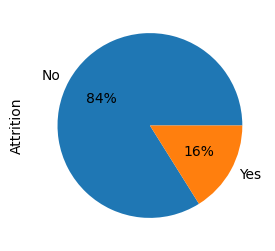

In [40]:
df.Attrition.value_counts().plot(kind='pie',
                                    autopct='%1.0f%%',
                                        figsize=(5, 3))

In [41]:
#Remove unneeded columns

df = df.drop('EmployeeNumber', axis = 1) # A number assignment 

df = df.drop('StandardHours', axis = 1) #Contains only value 80 

df = df.drop('EmployeeCount', axis = 1) #Contains only the value 1 

df = df.drop('Over18', axis = 1) #Contains only the value 'Yes'

In [42]:
df.head(3)

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,11,35,No,Travel_Rarely,809,Research & Development,16,3,Medical,1,...,3,3,1,6,5,3,5,4,0,3
1,12,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,4,...,3,4,0,10,3,3,9,5,0,8
2,13,31,No,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,...,3,4,1,5,1,2,5,2,4,3


<AxesSubplot: xlabel='MaritalStatus'>

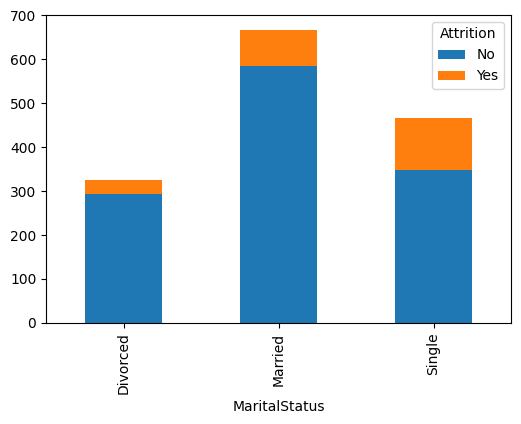

In [43]:
df.groupby(['MaritalStatus', 'Attrition']).size().unstack().plot(kind='bar',
                                                            stacked=True,
                                                            figsize=(6, 4))

<AxesSubplot: ylabel='Age'>

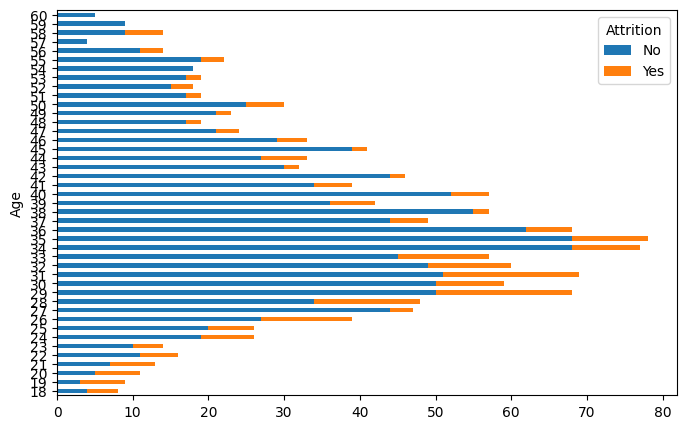

In [44]:
df.groupby(['Age', 'Attrition']).size().unstack().plot(kind='barh',
                                                  stacked=True,
                                                  figsize=(8, 5))

<AxesSubplot: xlabel='WorkLifeBalance'>

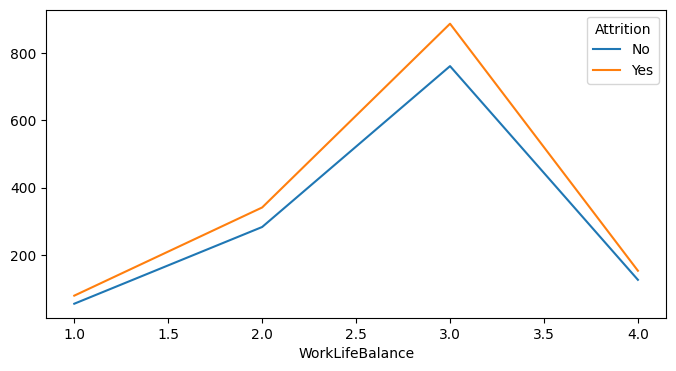

In [45]:
df.groupby(['WorkLifeBalance', 'Attrition']).size().unstack().plot(kind='line',
                                                              stacked=True,
                                                              figsize=(8, 4))

In [46]:
#In our dataset the Attrition column contains labels while the feature set consists of the rest of the columns. 
#The following script divides the dataset into features and labels sets.

fset =  df.drop(['Attrition'], axis=1)
lab = df.filter(['Attrition'], axis=1)

In [47]:
#The following script separates categorical features from numeric features in our dataset.

ccn = ['BusinessTravel',
                       'Department',
                       'EducationField',
                       'Gender',
                       'JobRole',
                       'MaritalStatus',
                       'OverTime'
                      ]

num_cols = fset.drop(ccn, axis=1)
cat_columns = fset.filter(ccn, axis = 1)

In [48]:
#The following script uses the Pandas get_dummies() method to convert categorical features in our dataset to one-hot encoded numeric features. 
#The output shows the total number of one-hot encoded columns.

cat_columns_one_hot = pd.get_dummies(cat_columns, drop_first=True)
cat_columns_one_hot.shape

(1460, 21)

In [49]:
X = pd.concat([num_cols,cat_columns_one_hot], axis=1)
X.shape

(1460, 45)

In [50]:
#conversion of the simple “Yes” and “No” values from our labels set to binary 1 and 0 values, respectively, using the following script

y =  lab['Attrition'].map({'Yes': 1, 'No': 0})
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Attrition, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 40, random_state = 42)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,pred ))
print(accuracy_score(y_test, pred ))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       250
           1       0.71      0.12      0.20        42

    accuracy                           0.87       292
   macro avg       0.79      0.56      0.57       292
weighted avg       0.85      0.87      0.82       292

0.8664383561643836


<AxesSubplot: >

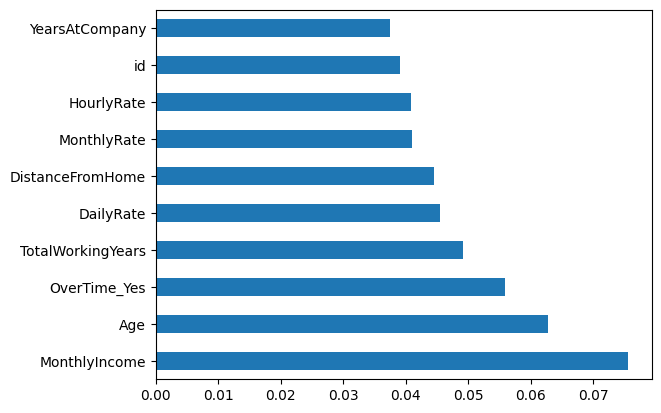

In [54]:
imp_feat = pd.Series(rf_clf.feature_importances_, index=X.columns)
imp_feat.nlargest(10).plot(kind='barh')

The above output shows that MonthlyIncome, Overtime and DailyRate are the top 3 factors behind employee attrition.

What is the relationship between Education and Monthly Income?

In [71]:
print('This is the relationship between Education and Monthly Income')

corr = df['Education'].corr(df['MonthlyIncome'])

corr

This is the relationship between Education and Monthly Income


0.09280615575714017

What is the effect of age on attrition?

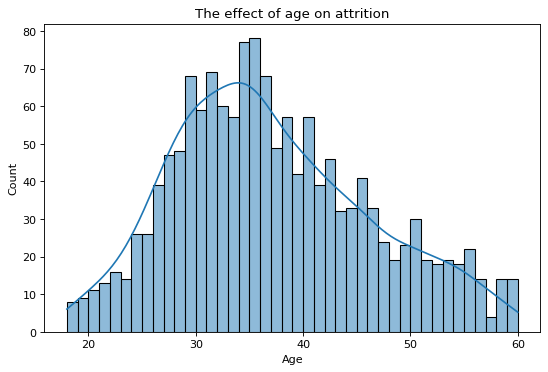

In [79]:
plt.figure(figsize=(8,5), dpi=80)
sns.histplot(data=df, x='Age', bins=42, kde=True).set_title('The effect of age on attrition');

From the chart above, the attrition rate keeps on falling with increasing age, as people look after stability in their jobs at these point of times. Also at a very younger age, i.e. from 18-20, the probability of an employee leaving the organization is far more since they are exploring at that point of time. It reaches a break even point at the age of 21.

Is Income the main factor in employee attrition?

In [57]:
ra = df.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
ra['MonthlyIncome']=round(ra['MonthlyIncome'],-3)

In [58]:
ra['Counts'].value_counts()

1    1303
2      68
3       7
Name: Counts, dtype: int64

In [59]:
ra = ra.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')

In [60]:
ra.head()

,MonthlyIncome,Attrition,Counts
0,1000,No,9
1,1000,Yes,10
2,2000,No,122
3,2000,Yes,63
4,3000,No,173


In [61]:
import plotly.express as px
import numpy as np

In [62]:
rate_att = df.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome'] = round(rate_att['MonthlyIncome'],-3)
rate_att = rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(rate_att,x="MonthlyIncome",y="Counts",color="Attrition",title="Monthly Income of IBM's employees")
fig.show()

Income is the main factor in employee attrition.

As seen in the above chart, the attrition rate is apparently high at very low income levels which is less than 5k monthly. This decreases further, but a minor spike is noticed around 10k which indicates the middle class liveliood. They tend to adjust towards a better standard of living, and hence move to a different job. When the monthly income is pretty decent, the possibility of an employee leaving the organization is low, as seen in the flat line.

How does work-life balance impact the overall attrition rate?

In [66]:
wlb = df.groupby(['WorkLifeBalance','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(wlb,x = "WorkLifeBalance", y = "Counts",color="Attrition",title="Work Life Balance of IBM's employees")

In [67]:
df.columns

Index(['id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [69]:
ncwrd = df.groupby(['NumCompaniesWorked','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(ncwrd,x='NumCompaniesWorked',y='Counts',color='Attrition',title='Work Experience level Counts of Employees in IBM')

As seen from the chart above, explicitly, employees who started their career with IBM or have switched to the company in the initial years of their career, have a higher chances of leaving the organization to a different company. People who have gained much experience working in multiple companies tend to stay in the company.
The lesser number of companies they have worked for, the higher is the attrition rate.